In [1]:
import json
import pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def countGrades(serie,grade):
    return len([g for g in serie if g == grade])

def percentageGrades(serie,grade):
    if(len(serie)):
        count = countGrades(serie,grade)
        return count / len(serie) * 100
    else:
        return None

def getPercentil(values : list,perc : int):
    values_ = [0 if x is None else x for x in values]
    values_.sort()
    count = len(values_)
    p_index = int(int(perc) / 100 * count)
    value = values_[p_index]
    return value

def makeGroups(df,group_by="issuer"):
    groups = df.groupby(group_by)
    groups = groups.agg(count=("identifier","count"),A=("grades",lambda x: countGrades(x,"A")),B=("grades",lambda x: countGrades(x,"B")),C=("grades",lambda x: countGrades(x,"C")),D=("grades",lambda x: countGrades(x,"D")),E=("grades",lambda x: countGrades(x,"E")),F=("grades",lambda x: countGrades(x,"F")),U=("grades",lambda x: countGrades(x,"U")),pA=("grades",lambda x: percentageGrades(x,"A")),pB=("grades",lambda x: percentageGrades(x,"B")),pC=("grades",lambda x: percentageGrades(x,"C")),pD=("grades",lambda x: percentageGrades(x,"D")),pE=("grades",lambda x: percentageGrades(x,"E")),pF=("grades",lambda x: percentageGrades(x,"F")),pU=("grades",lambda x: percentageGrades(x,"U")),min=("percentages", min),p5=("percentages",lambda x: getPercentil(x,5)),p25=("percentages",lambda x: getPercentil(x,25)),p50=("percentages",lambda x: getPercentil(x,50)),p75=("percentages",lambda x: getPercentil(x,75)),p95=("percentages",lambda x: getPercentil(x,95)),max=("percentages",max))
    groups = groups.sort_values("count",ascending=False)
    groups
    groups["p75+1.5IQR"] = groups["p75"] + 1.5 * (groups["p75"] - groups["p25"])
    groups["p25-1.5IQR"] = groups["p25"] - 1.5 * (groups["p75"] - groups["p25"])
    return groups

### record count by group
def plotCountByGroup(groups,labels=None):
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(8)
    if labels is None:
        labels = groups.index 
    plt.pie(groups["count"], labels = labels)
    plt.show()

### Record count by group histogram
def plotHistGroups(groups):
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(8)
    plt.hist(groups["count"],bins=50)

### grades by issuer bars
def plotGradesByGroupBars(df,group_by,labels=None,max : int=None):
    groups = df.copy()
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(8)  
    if labels is not None:
        groups.index = labels
    if max is not None:
        groups = groups.head(max)
    plt.bar(groups.index, groups["U"], color='grey')
    plt.bar(groups.index, groups["F"], bottom=groups["U"], color='purple')
    plt.bar(groups.index, groups["E"], bottom=groups["U"] + groups["F"], color='red')
    plt.bar(groups.index, groups["D"], bottom=groups["U"] + groups["F"]  + groups["E"], color='orange')
    plt.bar(groups.index, groups["C"], bottom=groups["U"] + groups["F"]  + groups["E"] + groups["D"], color='yellow')
    plt.bar(groups.index, groups["B"], bottom=groups["U"] + groups["F"]  + groups["E"] + groups["D"] + groups["C"], color='green')
    plt.bar(groups.index, groups["A"], bottom=groups["U"] + groups["F"]  + groups["E"] + groups["D"] + groups["C"]  + groups["B"], color='blue')

    plt.xlabel(group_by)
    plt.ylabel("record count")
    plt.legend(["U","F","E","D","C","B","A"])
    plt.title("Grades by %s" % group_by)
    plt.show()

### each grade by issuer bars
def plotGradesByGroupBarsSingle(df,group_by,labels=None,max : int=None):
    groups = df.copy()
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(8)

    if labels is not None:
        groups.index = labels
    if max:
        groups = groups.head(max)
    grades = ["A", "B", "C", "D", "E", "F"] 
    subplots = [231,232,233,234,235,236]
    for i in range(6):
        plt.subplot(subplots[i])
        grade = grades[i]
        plt.bar(groups.index, groups[grade])
        plt.xlabel(group_by)
        plt.ylabel("record count")
        plt.title("Grade %s" % grade)
    plt.show()

### box plot
def groupsBoxPlot(df,groups,group_by,max=None):
    df_ = df.copy()
    if max is not None:
        group_index = groups.index[0:max]
        df_ = df_[df_[group_by].isin(group_index)]
        order=group_index
    else:
        order=groups.index
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(8)
    sns.boxplot(x=df_[group_by],y=df_["percentages"],order=order)
    plt.show()

### grades pie for each group
def gradesByGroupPieSingle(groups,labels=None):
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(8)

    max = 15
    group_tags = groups.index[0:max]
    grid = 350
    #grids = [ grid + i for i in range(1,max+1)]
    grade_tags = ["A","B","C","D","E","F","U"]
    for i in range(max):
        if i >= len(groups.index):
            break
        group = group_tags[i]
        row = groups[groups.index == group]
        values = [row["A"][0],row["B"][0],row["C"][0],row["D"][0],row["E"][0],row["F"][0],row["U"][0]]
        plt.subplot(3,5,i+1)
        plt.pie(values, labels = grade_tags)
        title = group if labels is None else labels[i]
        plt.title(title)
    plt.show()


### histogram per group
def histogramPerGroupSingle(df,group_by,groups,labels=None):
    max = 15
    group_tags = groups.index[0:max]
    grade_tags = ["A","B","C","D","E","F","U"]
    for i in range(max):
        if i >= len(groups.index):
            break
        group = group_tags[i]
        group_rows = df[df[group_by] == group]
        plt.subplot(3,5,i+1)
        plt.hist(group_rows["percentages"], bins=20,range=(0,100))
        title = group if labels is None else labels[i]
        plt.title(title)
    plt.show()

### Import metrics results

In [2]:
f = open("../data/oscar/metrics/metrics__.json","r")
metrics = json.load(f)

### create dataframe

In [3]:
df = pandas.DataFrame({"identifier":metrics["identifier"],"organisation":metrics["organisation"],'country':metrics["country"], 'region':metrics["region"], 'totals':metrics["totals"], 'scores':metrics["scores"], 'percentages':metrics["percentages"], 'grades':metrics["grades"]})
df["issuer"] = [identifier.split("-")[1] for identifier in df["identifier"]]

## graphs

### global percentage histogram

(array([3.00e+00, 1.80e+01, 1.48e+02, 2.95e+02, 6.94e+02, 3.38e+02,
        3.36e+02, 5.83e+02, 1.97e+02, 6.62e+02, 6.74e+02, 1.18e+03,
        4.16e+02, 2.04e+02, 5.62e+02, 3.75e+02, 4.47e+02, 1.68e+02,
        3.21e+02, 1.73e+02, 1.24e+02, 9.50e+01, 6.90e+01, 1.07e+02,
        2.70e+01, 1.50e+01, 1.20e+01, 1.10e+01, 8.00e+00, 1.20e+01,
        6.00e+00, 3.00e+00, 3.00e+00, 1.60e+01, 1.90e+01, 3.20e+01,
        3.80e+01, 4.60e+01, 4.90e+01, 3.80e+01, 2.90e+01, 9.00e+00,
        9.00e+00, 4.00e+00, 5.00e+00, 2.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00]),
 array([ 8.182,  9.626, 11.07 , 12.514, 13.958, 15.402, 16.846, 18.29 ,
        19.734, 21.178, 22.622, 24.066, 25.51 , 26.954, 28.398, 29.842,
        31.286, 32.73 , 34.174, 35.618, 37.062, 38.506, 39.95 , 41.394,
        42.838, 44.282, 45.726, 47.17 , 48.614, 50.058, 51.502, 52.946,
        54.39 , 55.834, 57.278, 58.722, 60.166, 61.61 , 63.054, 64.498,
        65.942, 67.386, 68.83 , 70.274, 71.718, 73.162, 74.606, 76

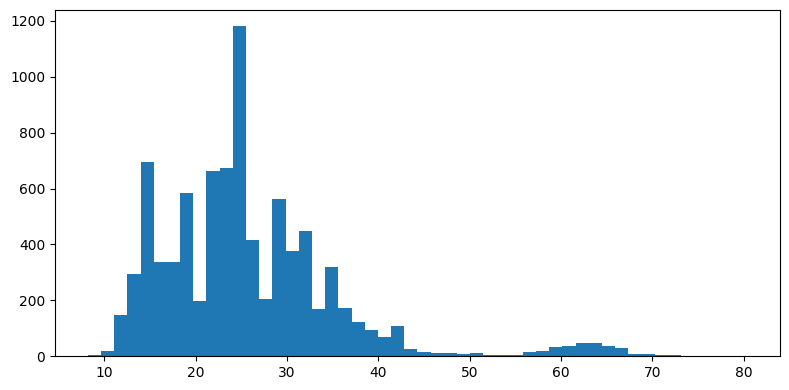

In [4]:
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True
plt.hist(df["percentages"],bins=50)

### global grades

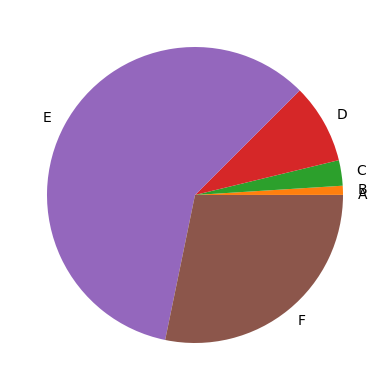

In [5]:
grade_count = df.groupby("grades").agg(count=("identifier","count"))


plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True
plt.pie(grade_count["count"], labels = grade_count.index)
plt.show()

### Group by [issuer, organisation, country, region] and get stats

## group by issuer

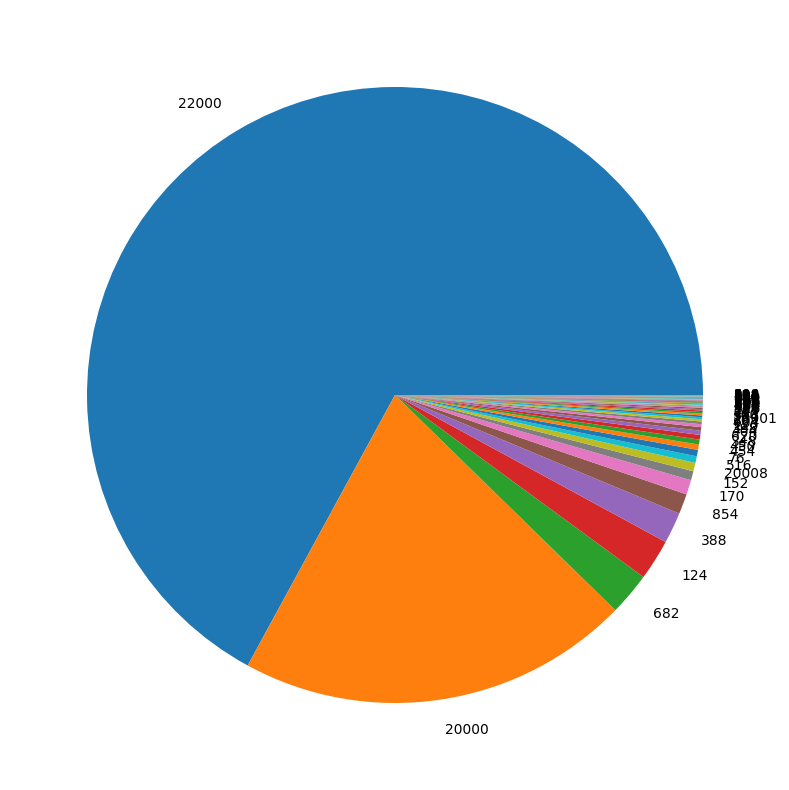

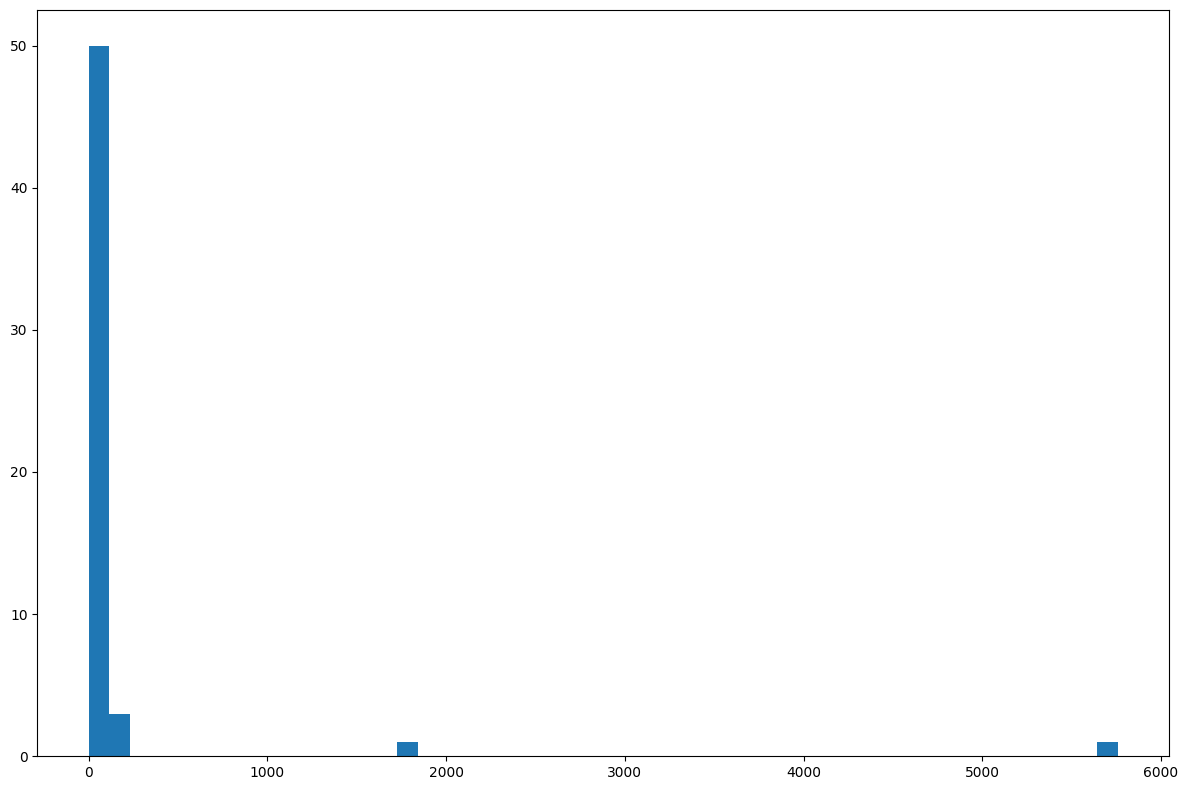

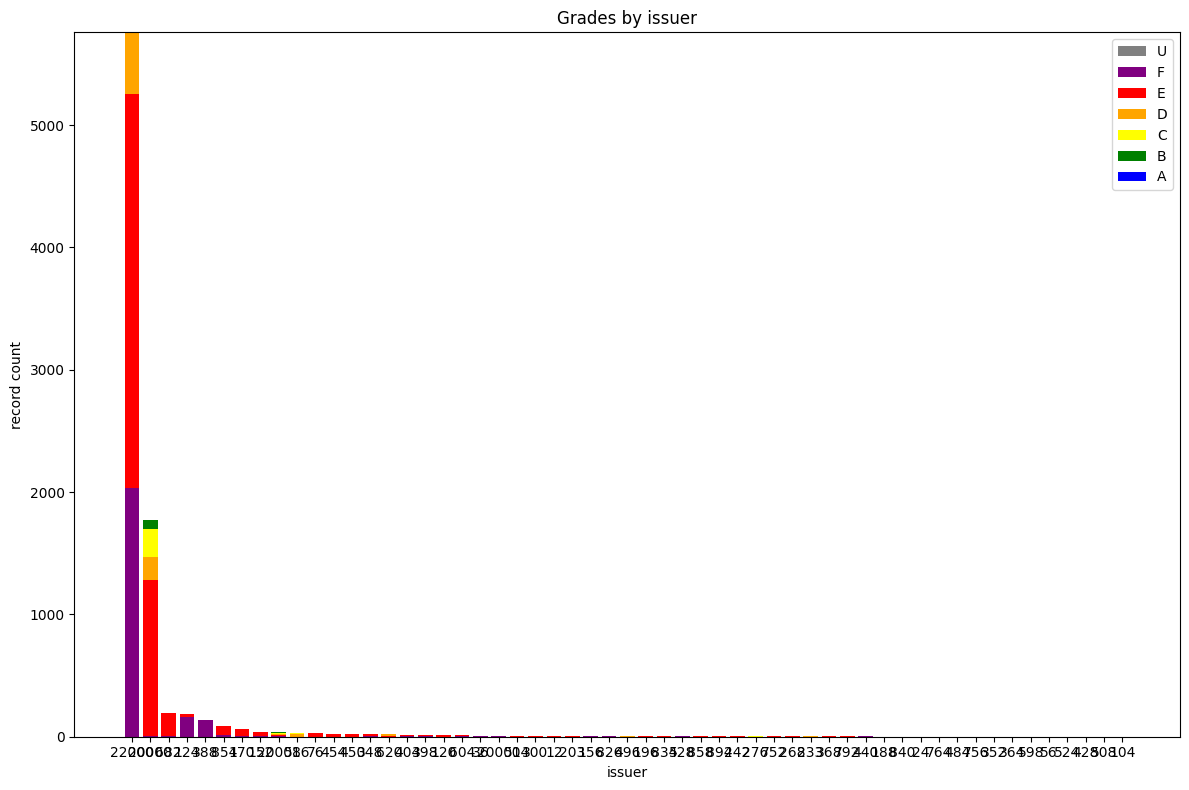

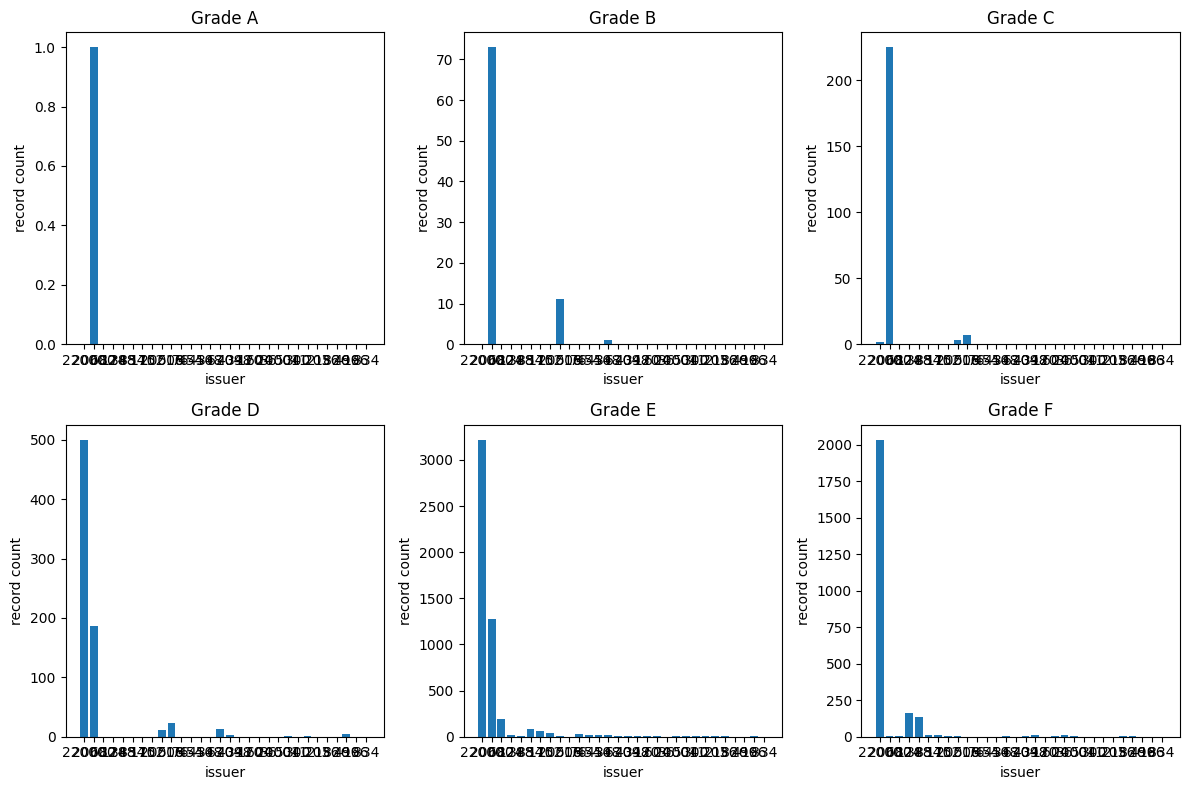

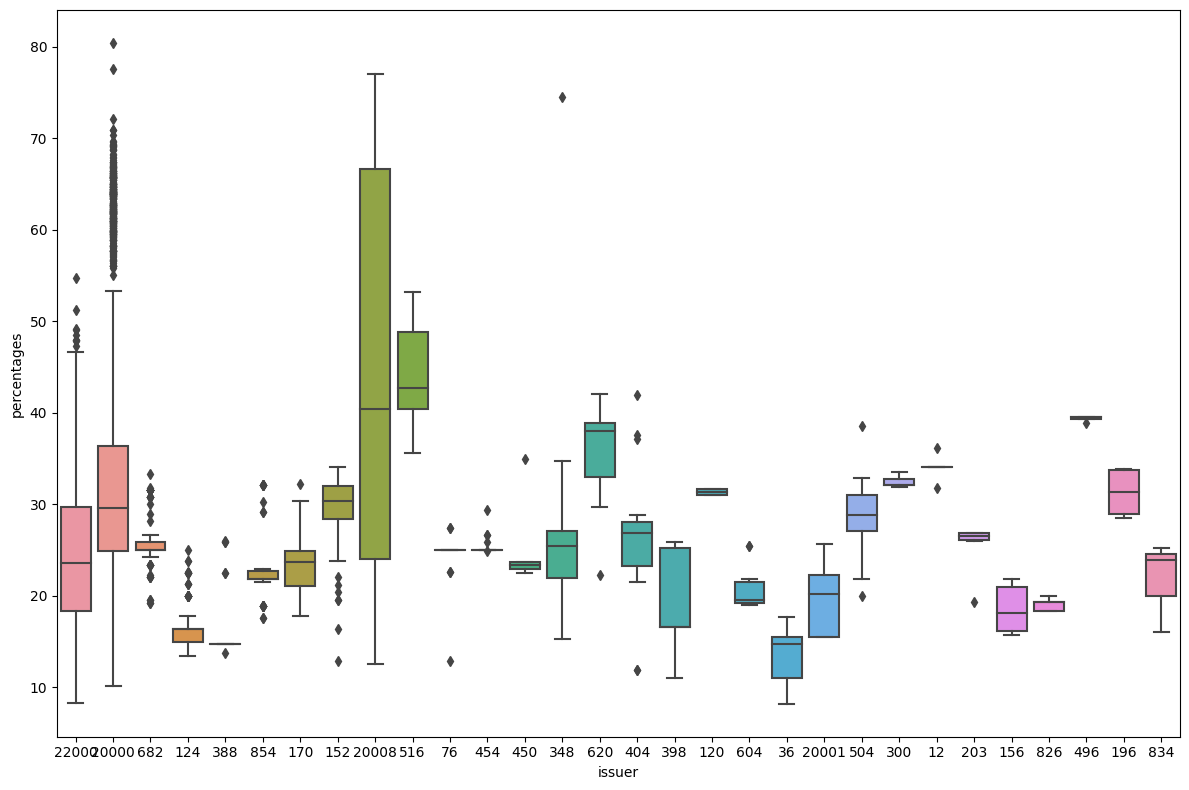

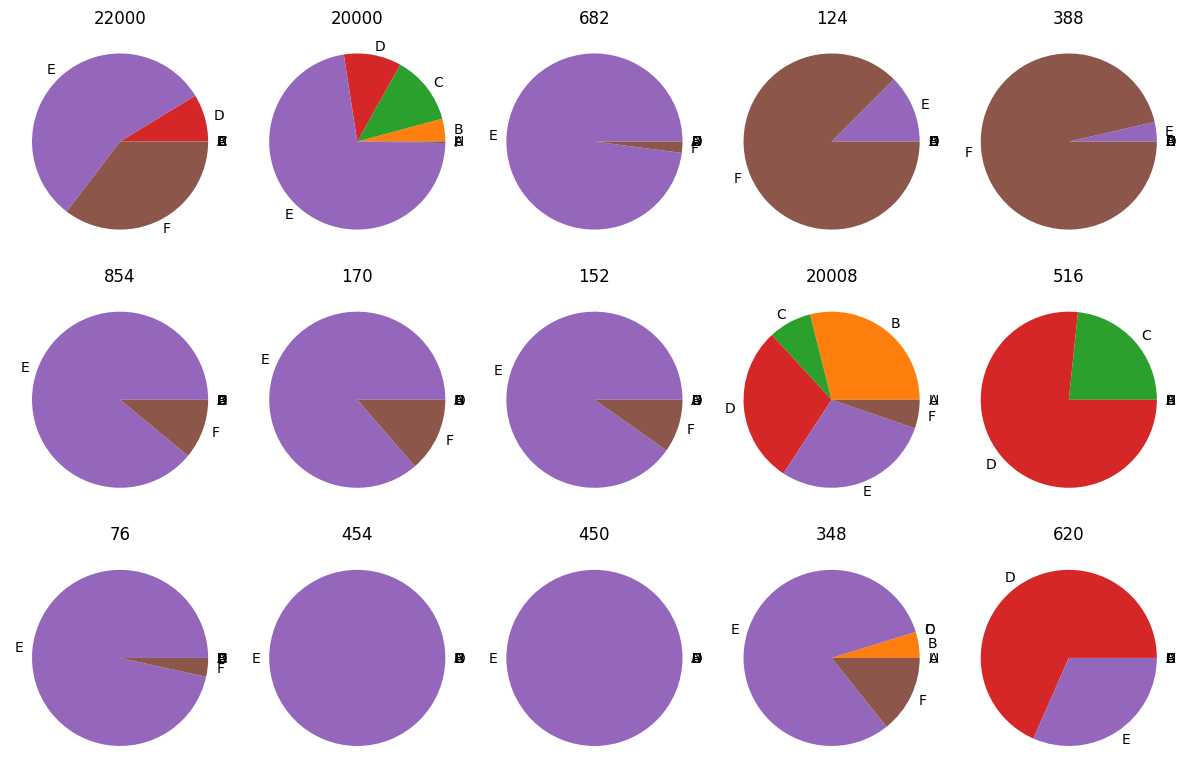

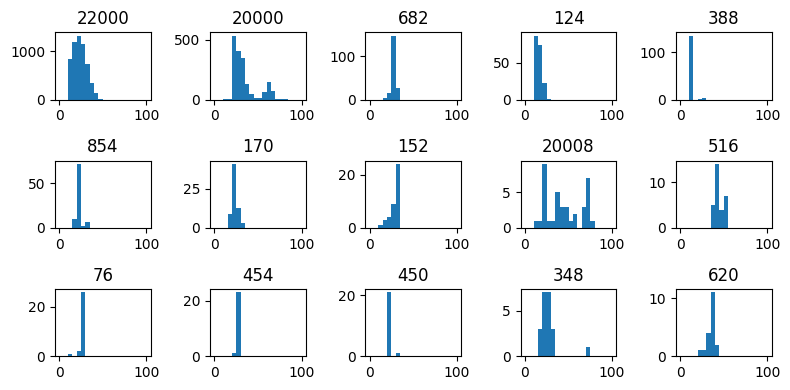

In [6]:
group_by = "issuer" # organisation, country, region
groups = makeGroups(df,group_by)
plotCountByGroup(groups)
plotHistGroups(groups)
plotGradesByGroupBars(groups,group_by)
plotGradesByGroupBarsSingle(groups,group_by,max=30)
groupsBoxPlot(df,groups,group_by,30)
gradesByGroupPieSingle(groups)
histogramPerGroupSingle(df,group_by,groups)

## group by country

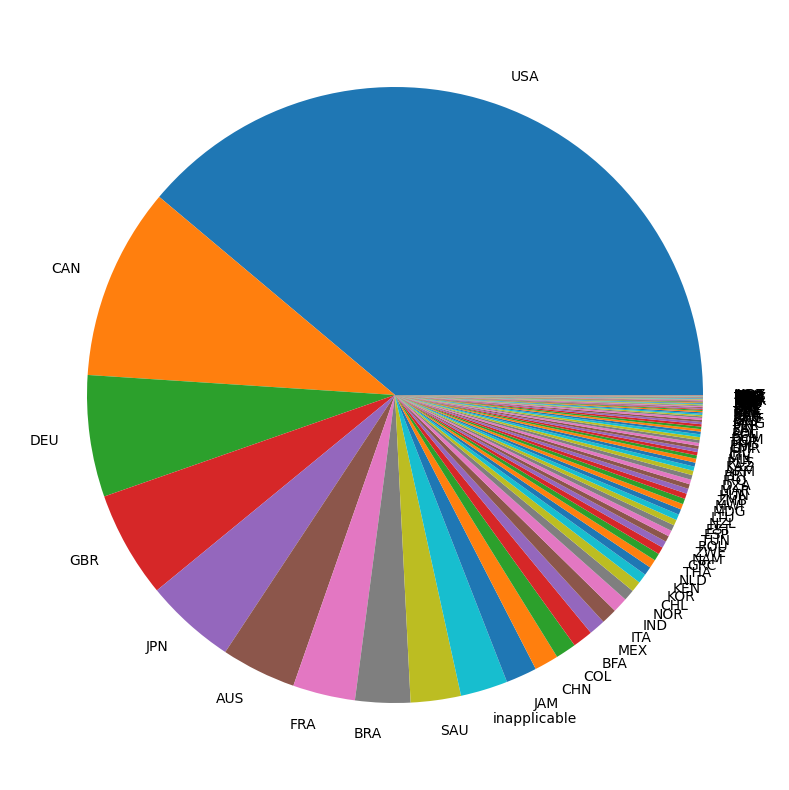

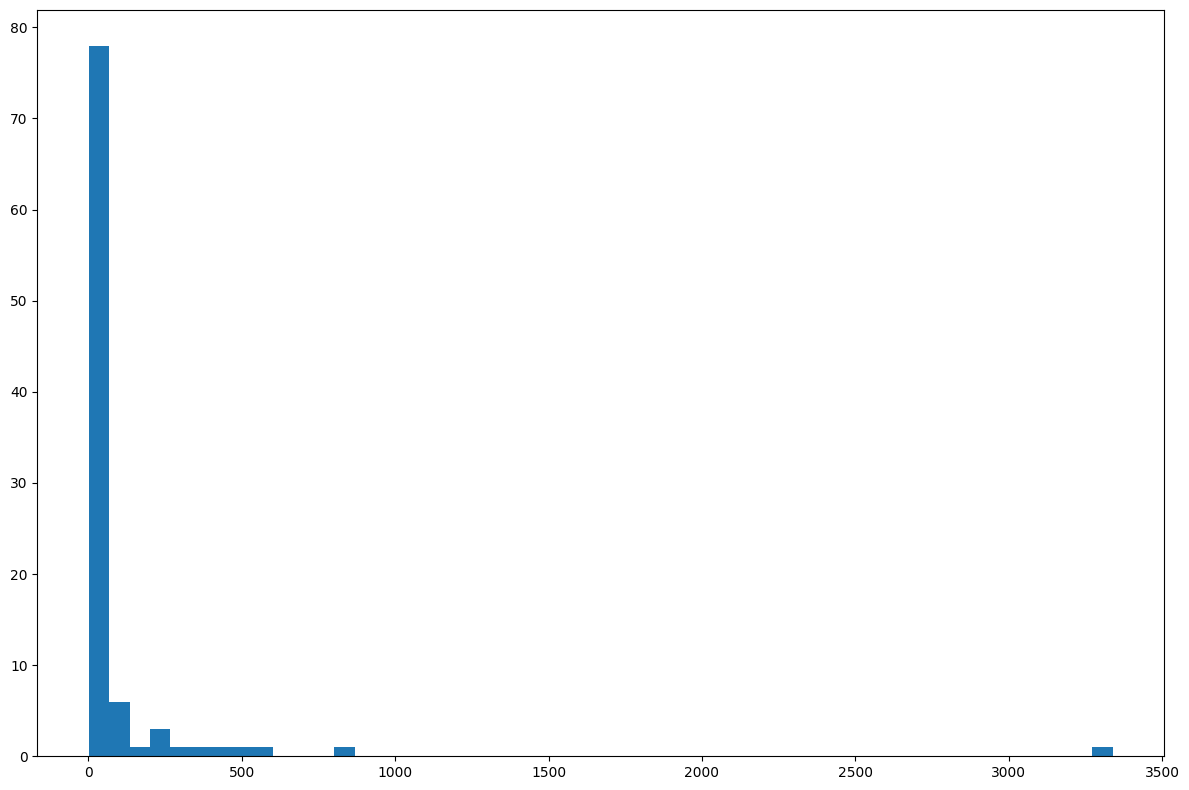

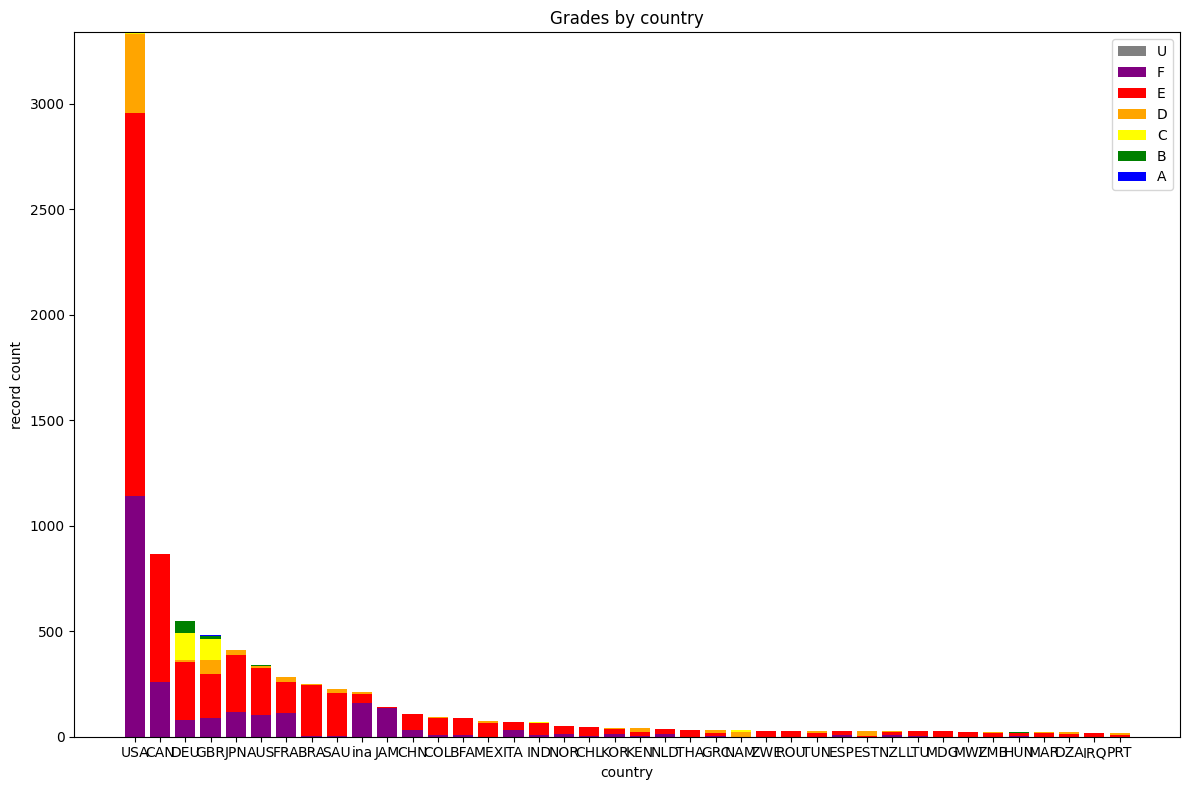

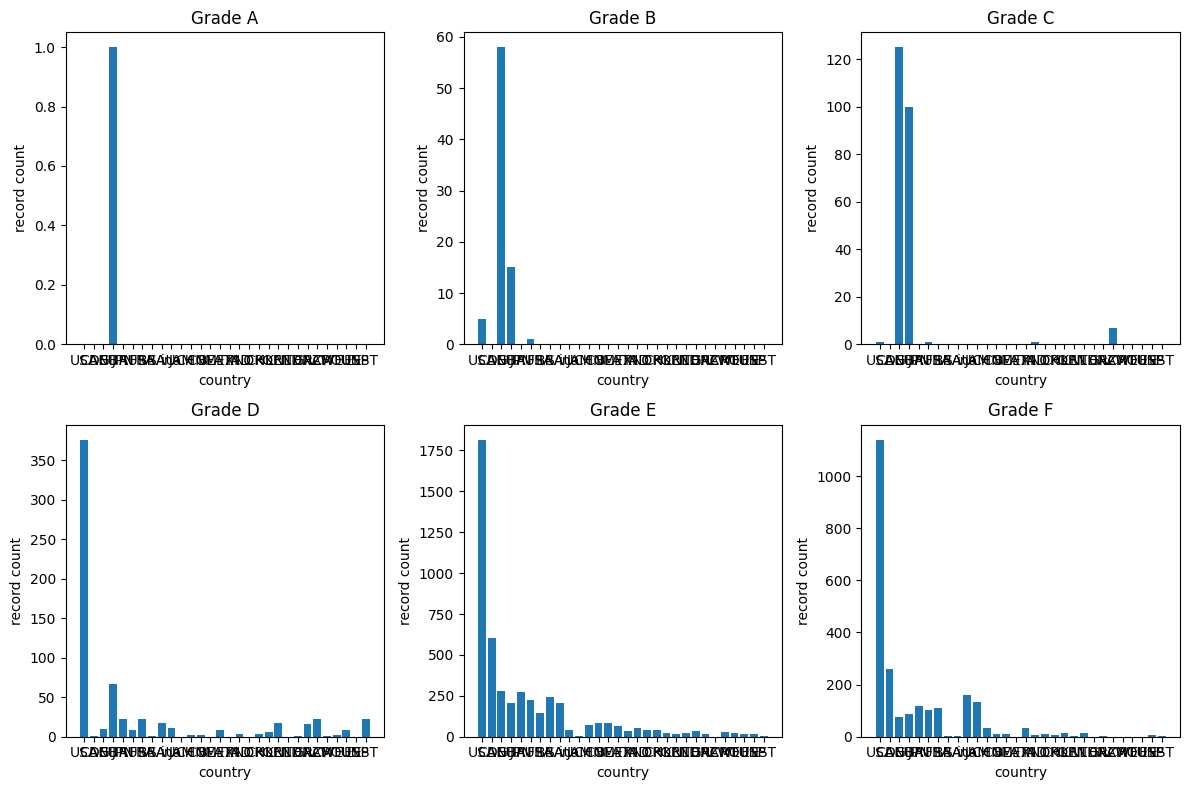

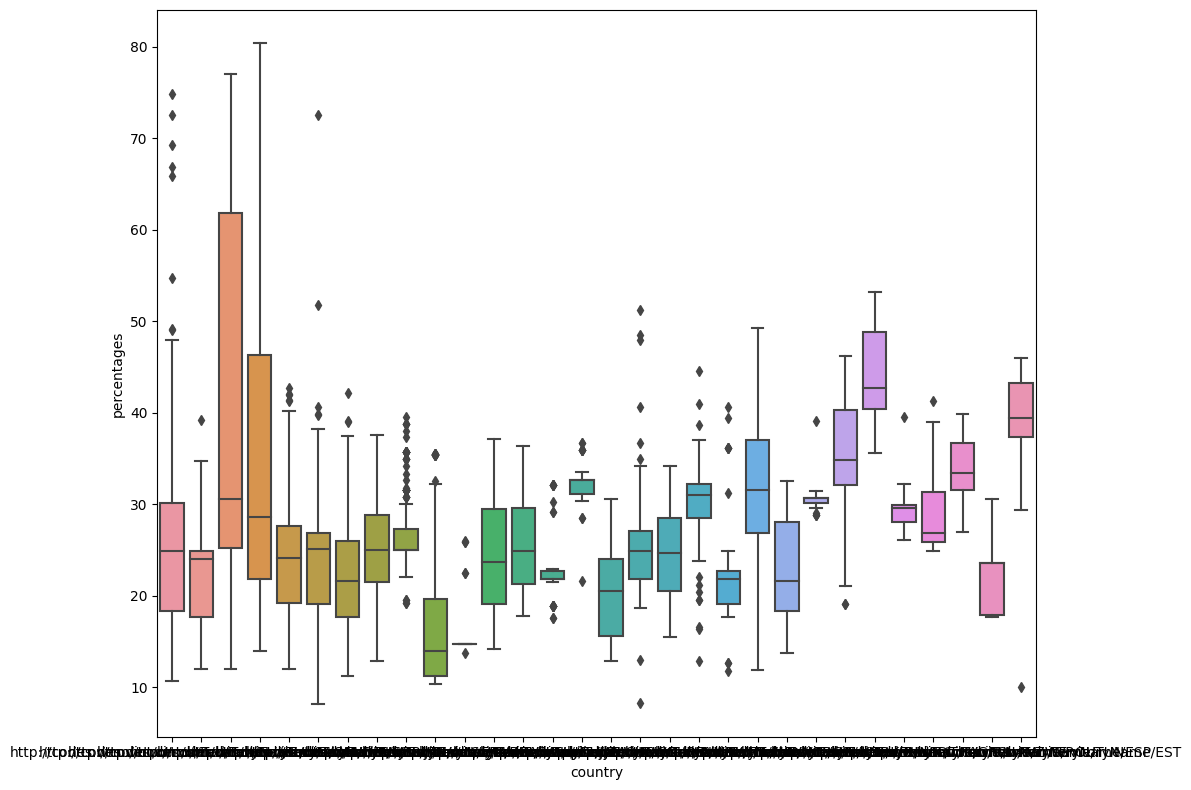

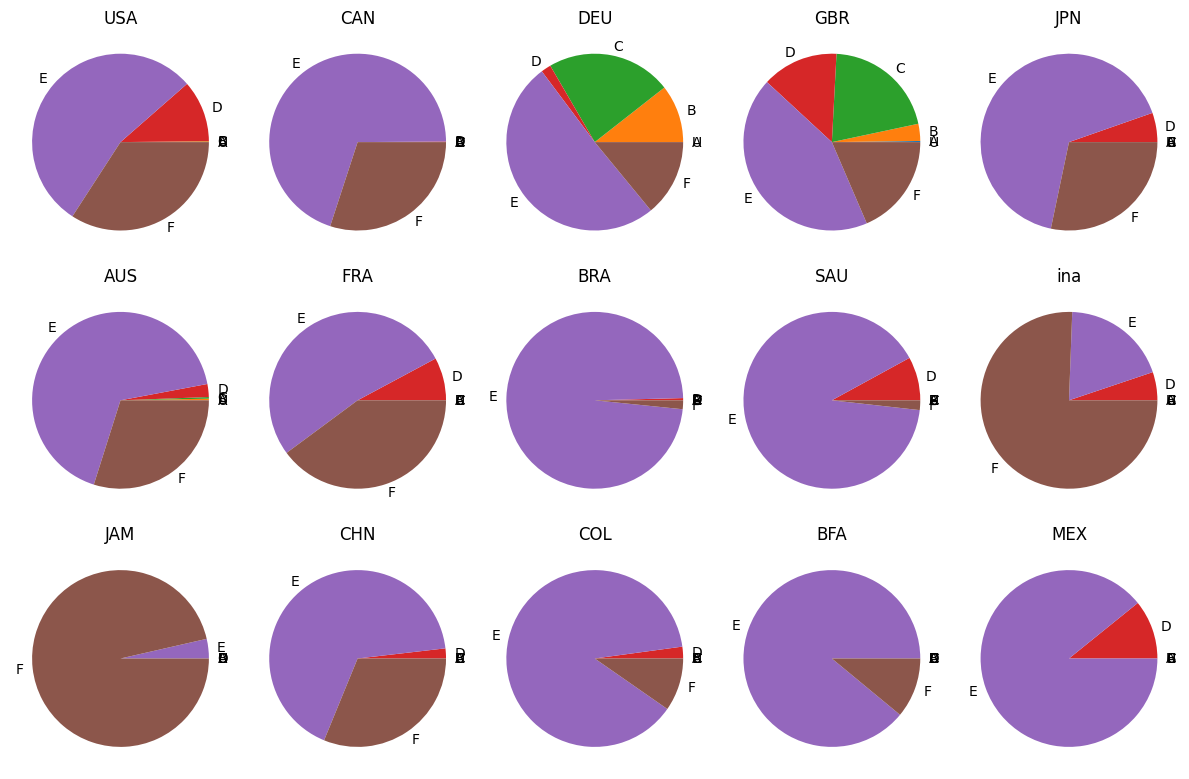

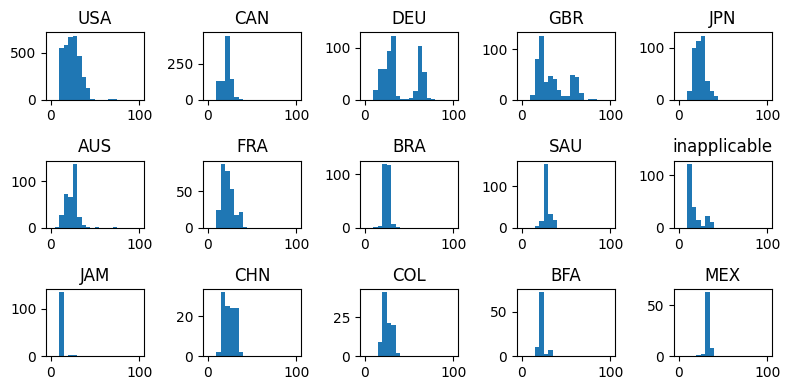

In [7]:
group_by="country"
groups = makeGroups(df,group_by)
plotCountByGroup(groups,[href.split("/")[len(href.split("/"))-1] for href in groups.index])
plotHistGroups(groups)
plotGradesByGroupBars(groups,group_by,[href.split("/")[len(href.split("/"))-1][0:3] for href in groups.index],max=40)
plotGradesByGroupBarsSingle(groups,group_by,labels=[href.split("/")[len(href.split("/"))-1][0:3] for href in groups.index],max=30)
groupsBoxPlot(df,groups,group_by,max=30)
gradesByGroupPieSingle(groups,labels=[href.split("/")[len(href.split("/"))-1][0:3] for href in groups.index])
histogramPerGroupSingle(df,group_by,groups,labels=[href.split("/")[len(href.split("/"))-1] for href in groups.index])

## group by organisation

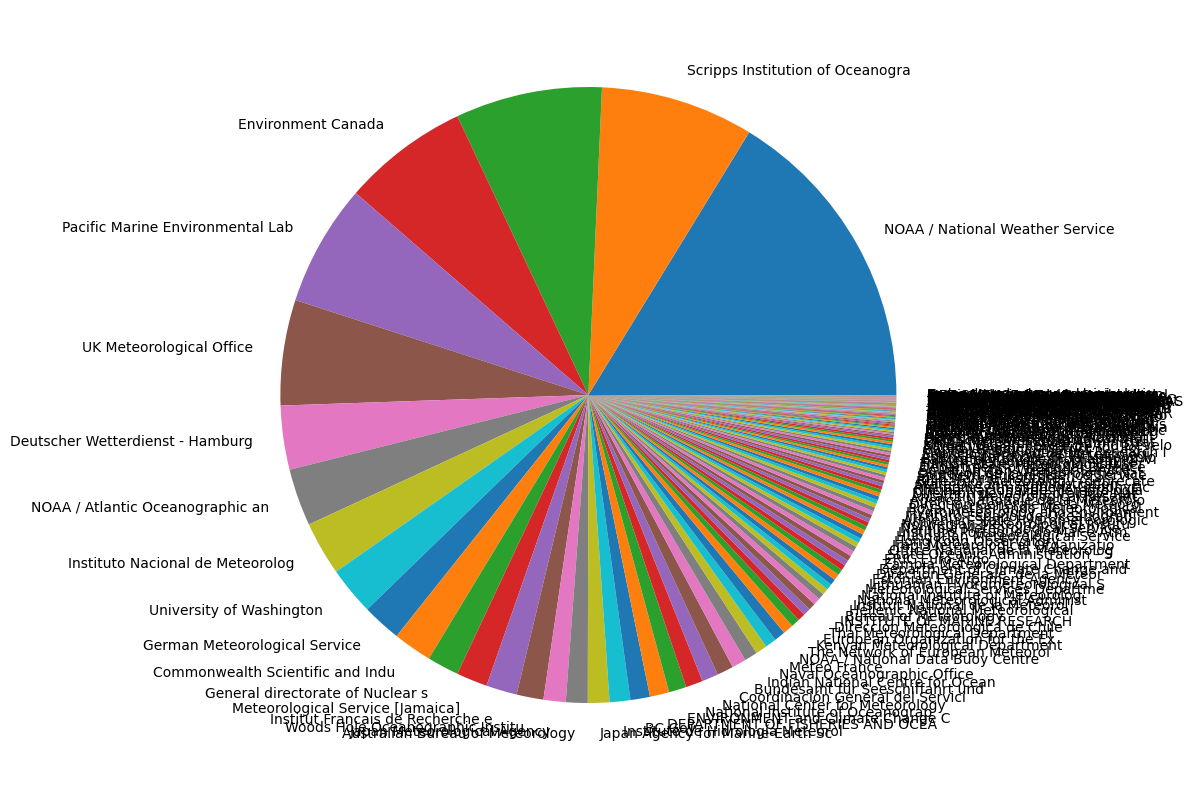

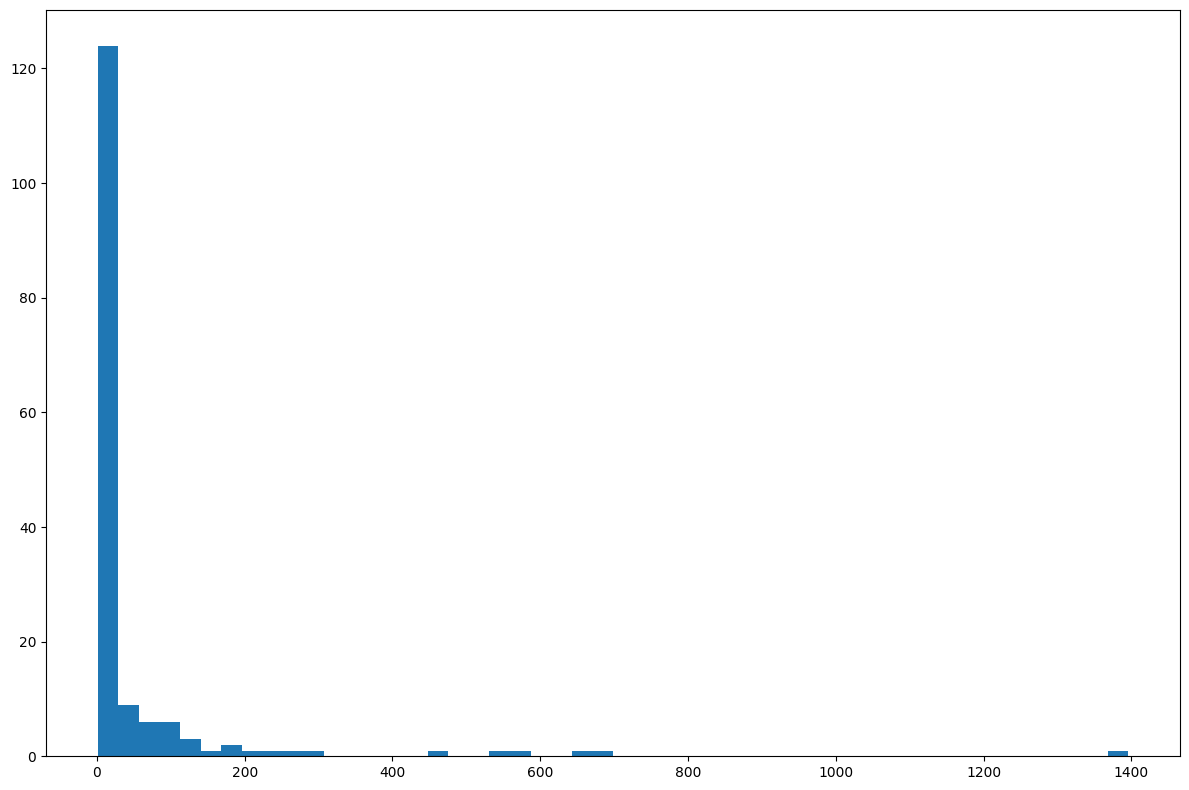

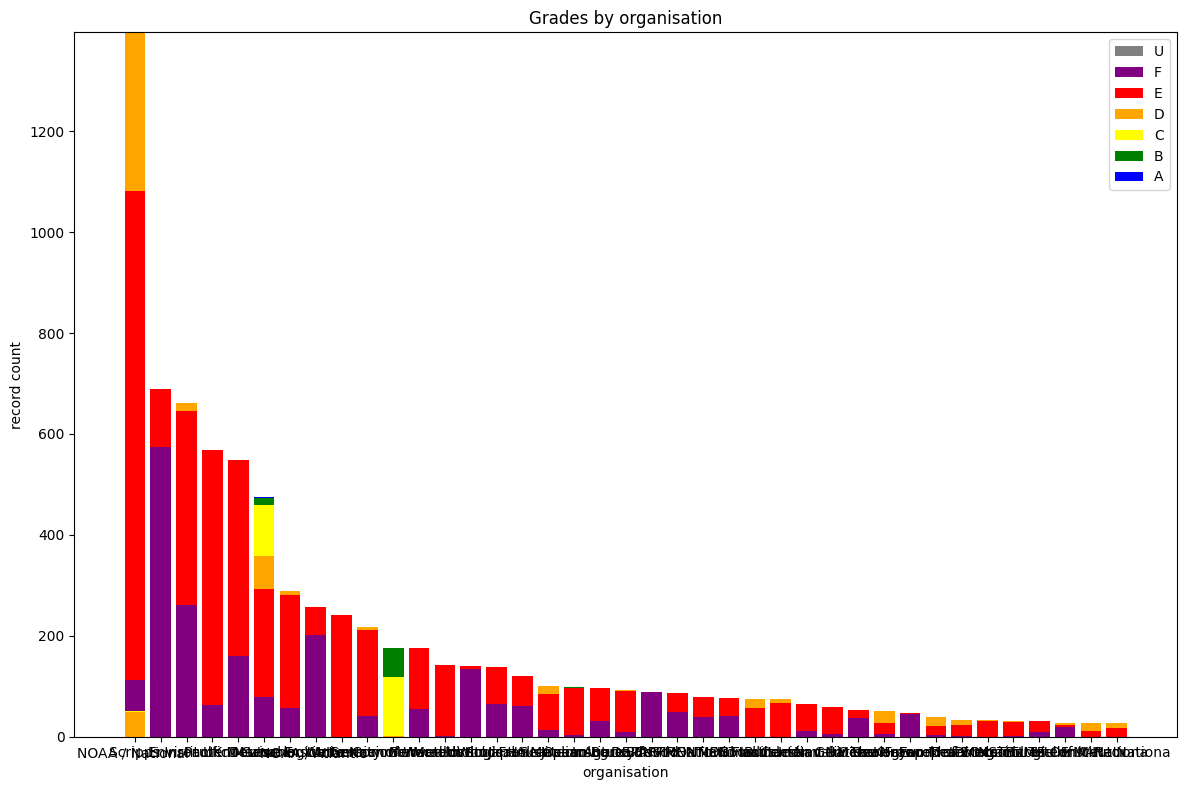

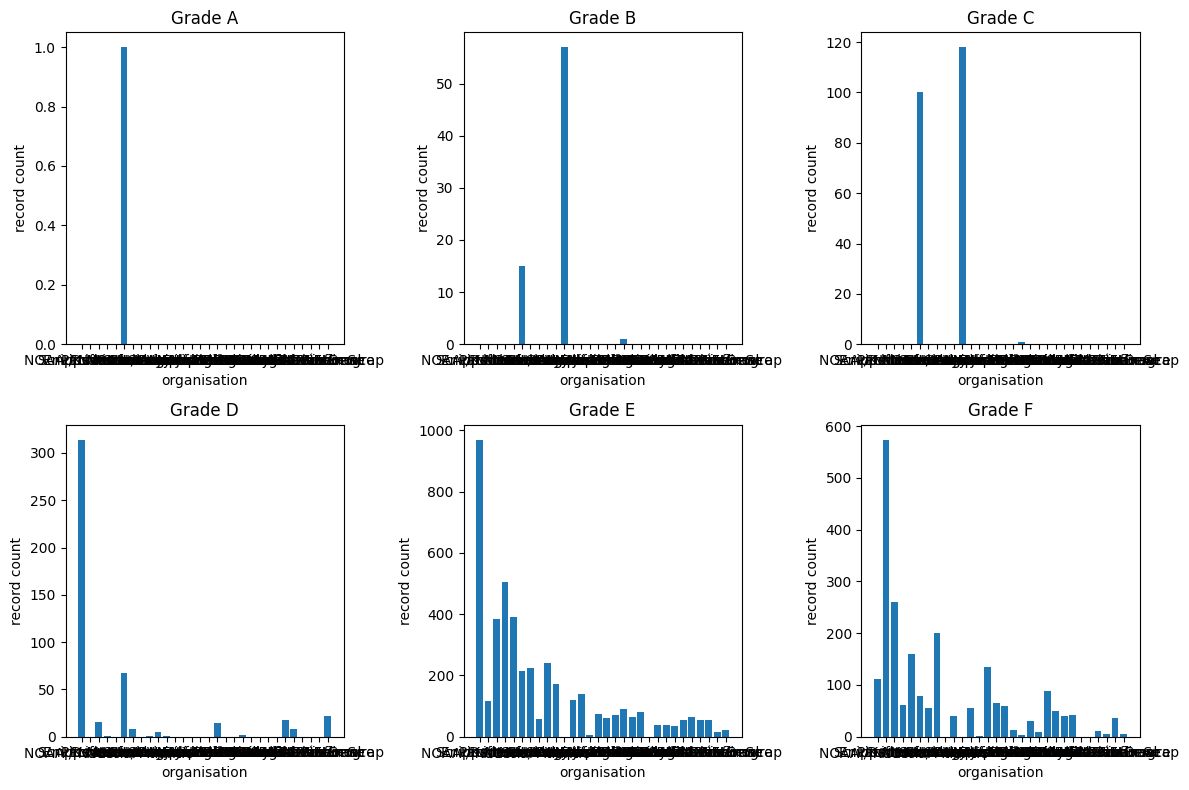

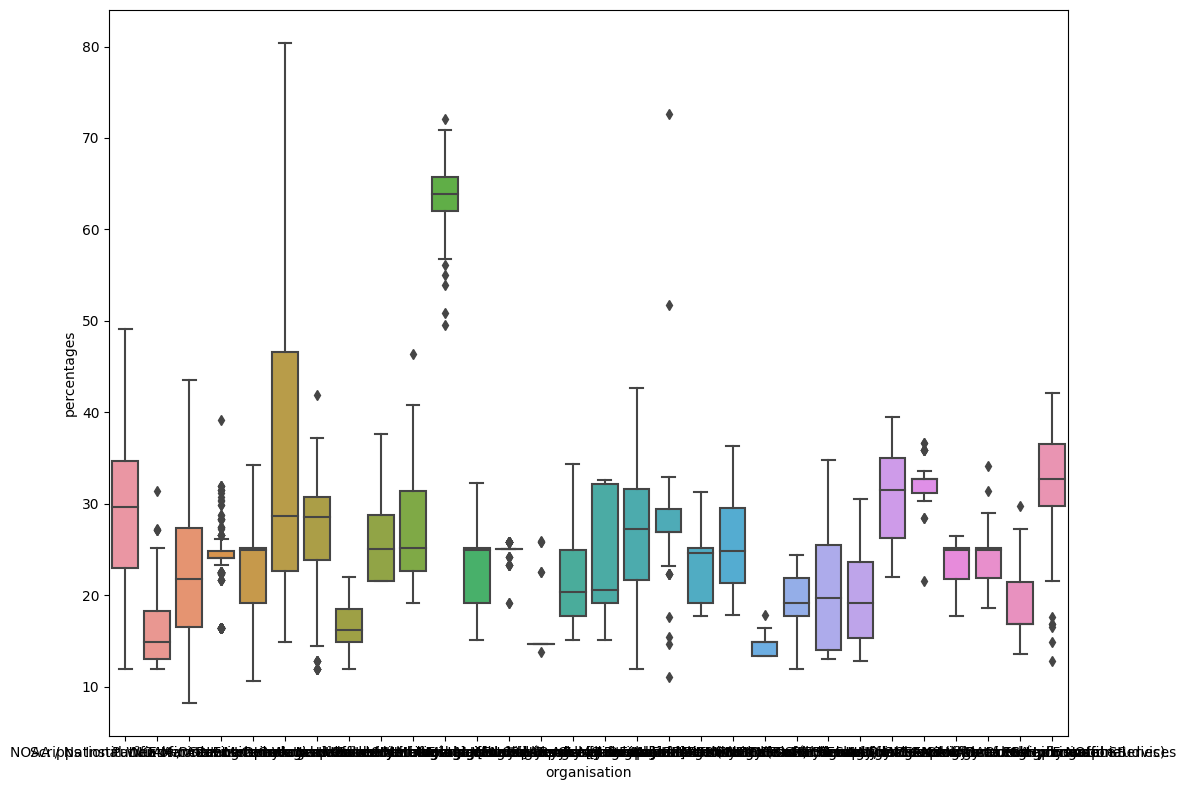

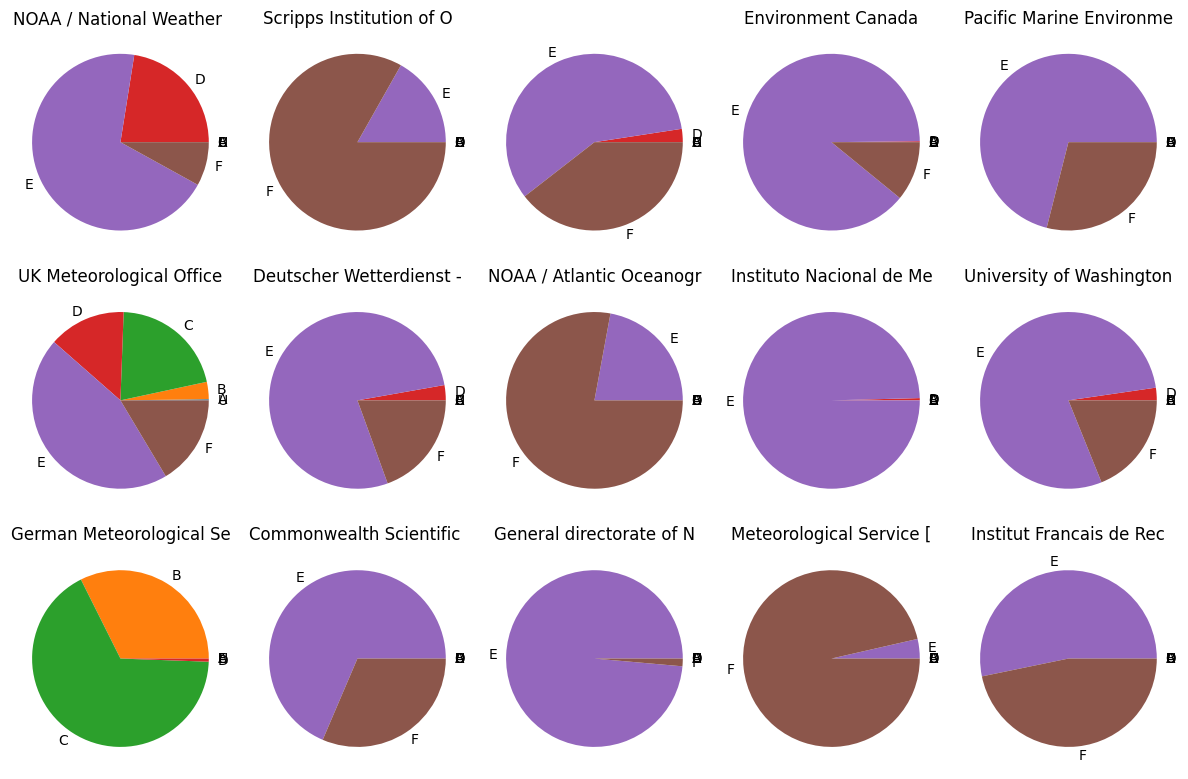

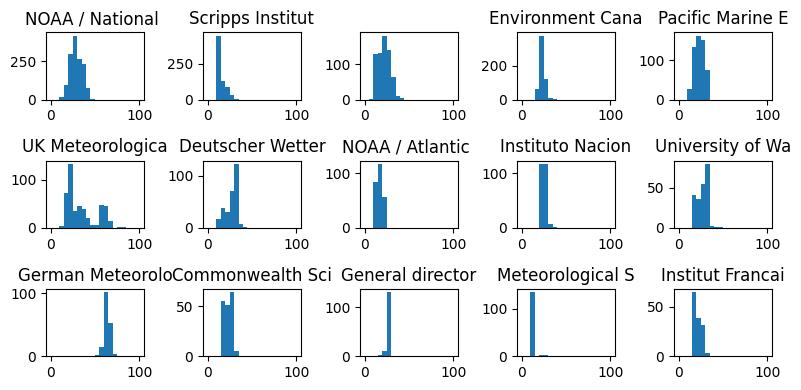

In [8]:
group_by="organisation"
groups = makeGroups(df,group_by)
plotCountByGroup(groups,labels=[name[0:32] for name in groups.index])
plotHistGroups(groups)
plotGradesByGroupBars(groups,group_by,max=40,labels=[name[0:16] for name in groups.index])
plotGradesByGroupBarsSingle(groups,group_by,max=30,labels=[name[0:16] for name in groups.index])
groupsBoxPlot(df,groups,group_by,max=30)
gradesByGroupPieSingle(groups,labels=[name[0:24] for name in groups.index])
histogramPerGroupSingle(df,group_by,groups,labels=[name[0:16] for name in groups.index])

## group by region

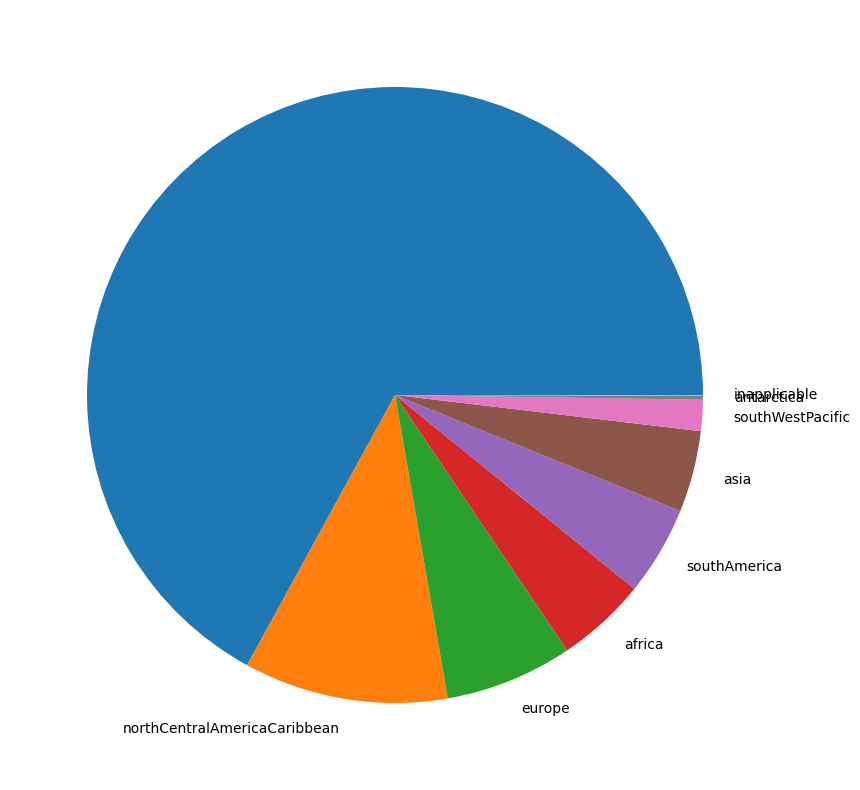

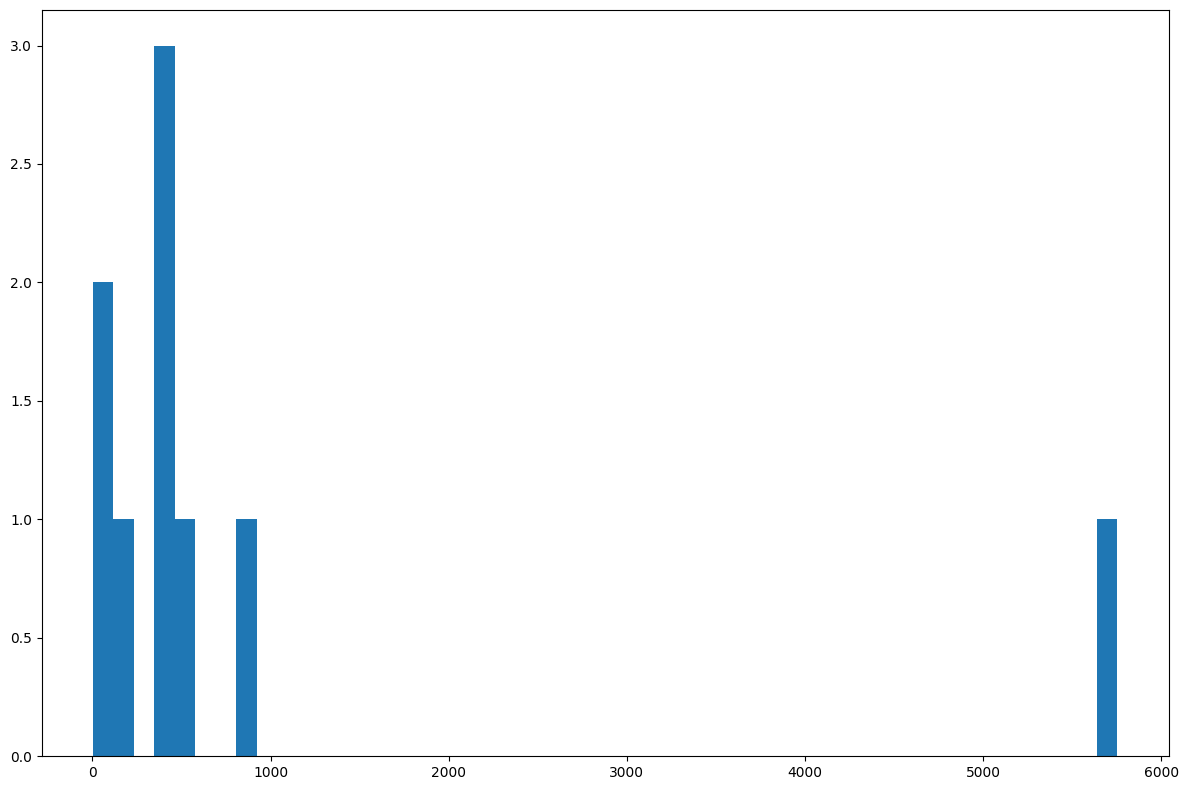

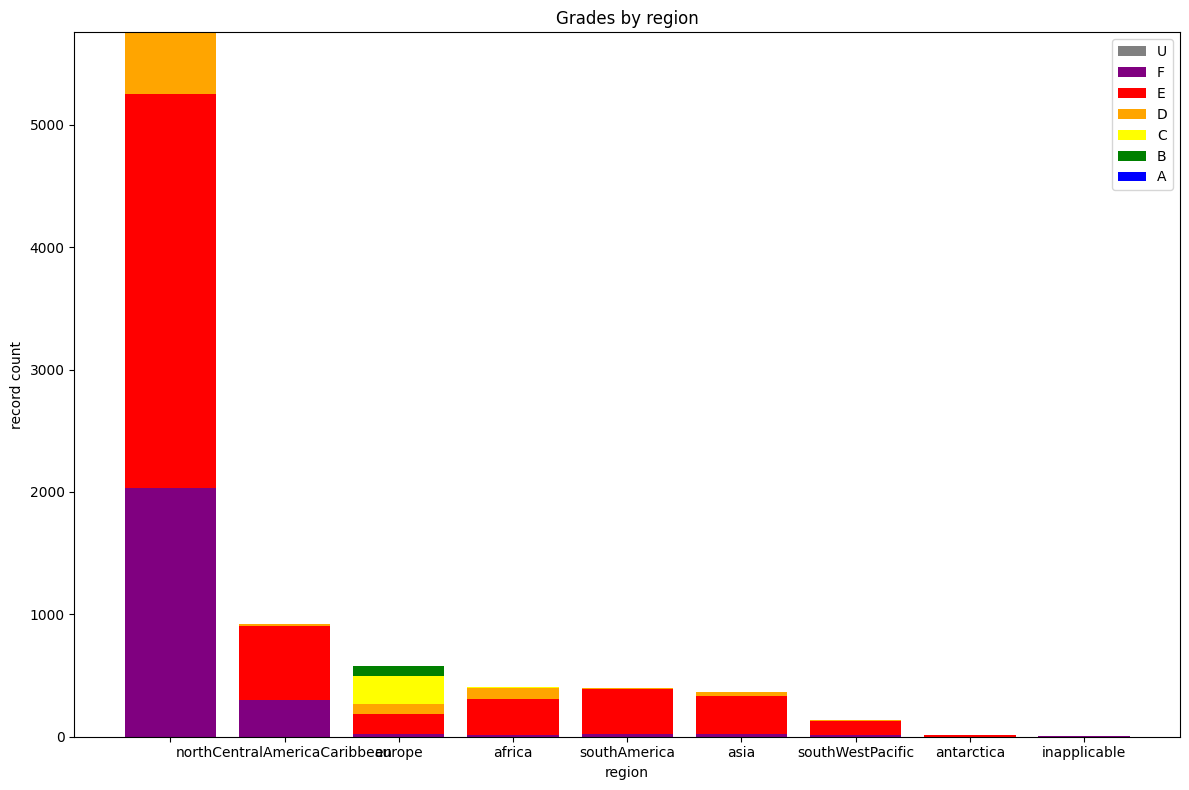

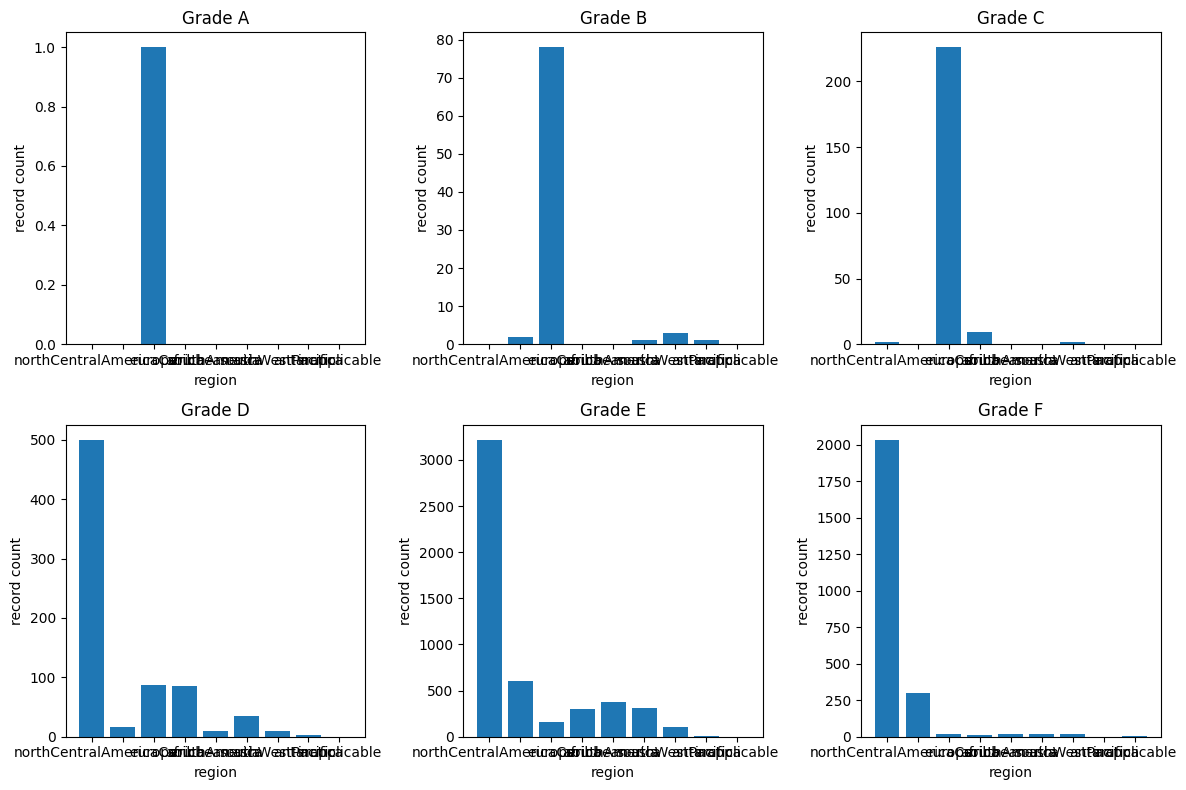

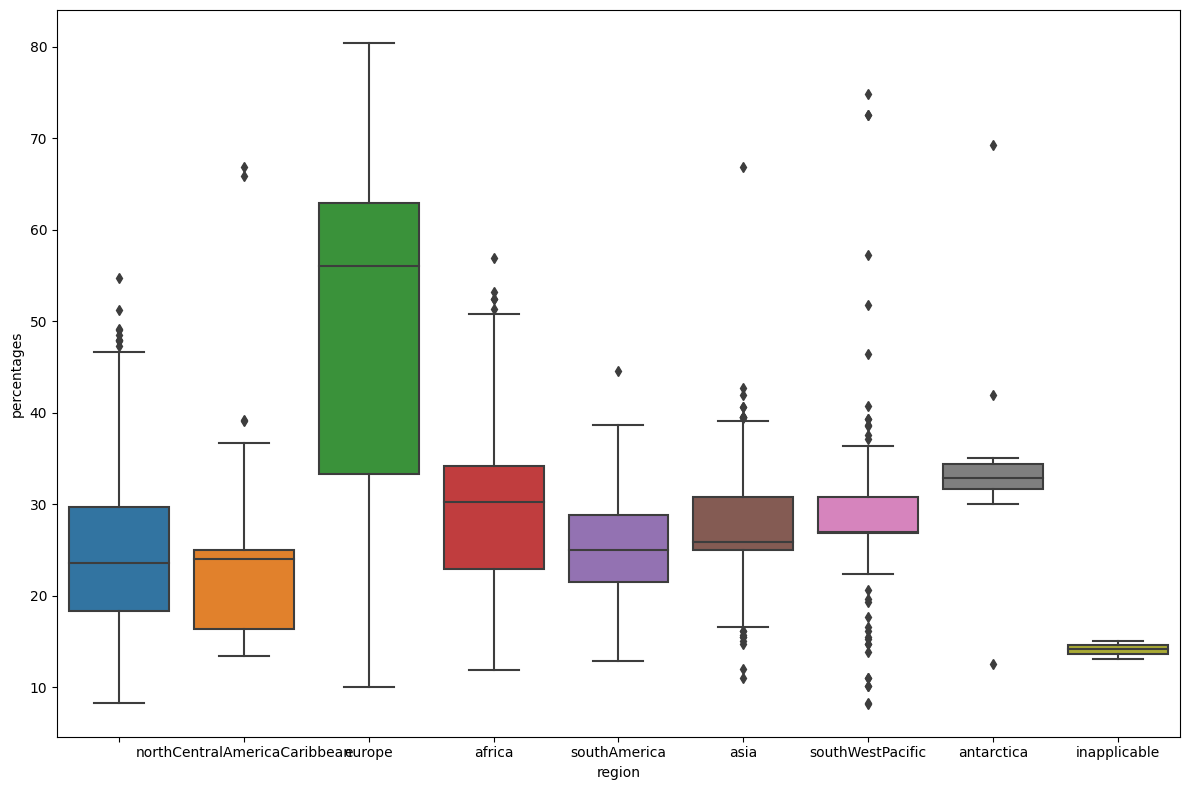

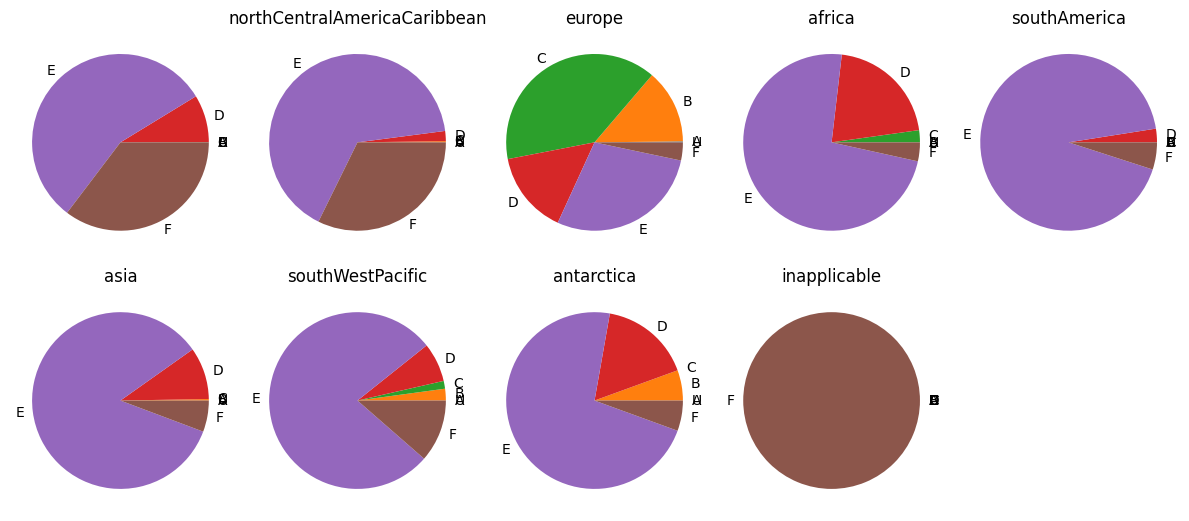

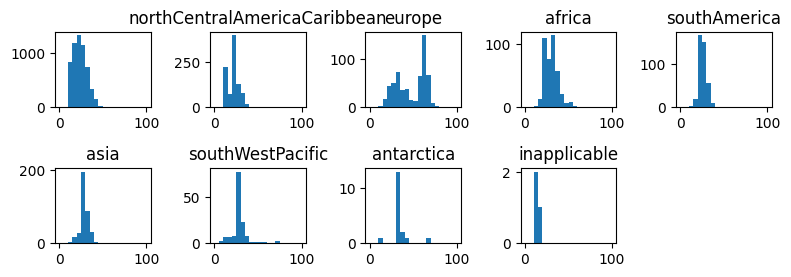

In [9]:
group_by="region"
groups = makeGroups(df,group_by)
plotCountByGroup(groups,labels=[name.split("/")[len(name.split("/"))-1] for name in groups.index])
plotHistGroups(groups)
plotGradesByGroupBars(groups,group_by,max=40,labels=[name.split("/")[len(name.split("/"))-1] for name in groups.index])
plotGradesByGroupBarsSingle(groups,group_by,max=30,labels=[name.split("/")[len(name.split("/"))-1] for name in groups.index])
df_ = df.copy()
df_["region"] = [name.split("/")[len(name.split("/"))-1] for name in list(df_["region"])]
groups_ = makeGroups(df_,group_by)
groupsBoxPlot(df_,groups_,group_by,max=30)
gradesByGroupPieSingle(groups,labels=[name.split("/")[len(name.split("/"))-1] for name in groups.index])
histogramPerGroupSingle(df,group_by,groups,labels=[name.split("/")[len(name.split("/"))-1] for name in groups.index])